In [1]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv('test.csv')

In [4]:
df = pd.concat([train,test],sort=False).drop_duplicates().reset_index(drop=True)

# Checking Missing Values

In [5]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Utilities           2
Functional          2
BsmtFullBath        2
BsmtHalfBath        2
GarageArea          1
BsmtFinSF2          1
Exterior1st         1
TotalBsmtSF         1
GarageCars          1
BsmtUnfSF           1
                 ... 
LotConfig           0
Neighborhood        0
HeatingQC           0
ExterQual           0
TotRmsAbvGrd        0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive

## Fill missing value in Electrical

In [6]:
df['Electrical'] = df['Electrical'].fillna(0)

## Fill missing values associated with basement

For basement data, they are dependent with each other, nan in BsmtExposure means the house doesn't have a basement, we just fill the missing value with None

In [7]:
df['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [8]:
df[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','BsmtFinSF2','BsmtUnfSF']][df['BsmtExposure'].isnull().values==True]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtFinSF2,BsmtUnfSF
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0
182,NaN,NaN,NaN,NaN,NaN,0.0,0.0
259,NaN,NaN,NaN,NaN,NaN,0.0,0.0
342,NaN,NaN,NaN,NaN,NaN,0.0,0.0
362,NaN,NaN,NaN,NaN,NaN,0.0,0.0
371,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [9]:
df.at[948,'BsmtExposure']='No'

The same applies to variable "BsmtFinType2", accroding to data description, "NaN" means no basement, however, the value in Basementexposure is "No", which means the house has a basement but without multiple types. Thus, we fill it with Unf, which is unfinished. (there is no N/A or similar values corresponding to this situation)

In [10]:
df[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']][df['BsmtFinType2'].isnull().values==True]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,No,NaN,GLQ,TA,Gd
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


In [11]:
df.at[332,'BsmtFinType2']='Unf'

In [12]:
df[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']][df['BsmtQual'].isnull().values==True]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [13]:
df.at[2217,'BsmtQual']='Fa'
df.at[2218,'BsmtQual']='TA'

In [14]:
df[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']][df['BsmtCond'].isnull().values==True]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [15]:
df.at[2185,'BsmtCond']='TA'
df.at[2524,'BsmtCond']='TA'

In [16]:
df[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']][df['BsmtExposure'].isnull().values==True]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [17]:
df.at[2348,'BsmtExposure']='No'

In [18]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [19]:
for col in ('BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF1'):
    df[col] = df[col].fillna(0)

In [20]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageType        157
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
Utilities           2
KitchenQual         1
Exterior1st         1
Exterior2nd         1
GarageCars          1
GarageArea          1
SaleType            1
OverallCond         0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
RoofMatl            0
RoofStyle           0
                 ... 
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
Fireplaces          0
TotRmsAbvGrd        0
KitchenAbvGr        0
BedroomAbvGr        0
FullBath            0
BsmtFinSF1

In [21]:
df[['GarageQual','GarageYrBlt','GarageFinish','GarageCond','GarageType']][df['GarageQual'].isnull().values==True]

,GarageQual,GarageYrBlt,GarageFinish,GarageCond,GarageType
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


In [22]:
df.at[2576,'GarageType']='None'
df.at[2126,'GarageType']='None'

In [23]:
for col in ('GarageQual','GarageYrBlt','GarageFinish','GarageCond','GarageType'):
    df[col] = df[col].fillna('None')

In [24]:
df['GarageArea']=df['GarageArea'].fillna(0)
df['GarageCars']=df['GarageCars'].fillna(0)

In [25]:
df.at[2592,'GarageYrBlt']=2007

In [26]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
Utilities           2
SaleType            1
KitchenQual         1
Exterior1st         1
Exterior2nd         1
RoofMatl            0
RoofStyle           0
BsmtQual            0
ExterQual           0
ExterCond           0
Foundation          0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
YearRemodAdd        0
OverallQual         0
YearBuilt           0
OverallCond         0
                 ... 
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
GarageYrBlt         0
GarageType          0
Fireplaces          0
LowQualFin

## Fill missing values associated with Masonry

Same applies to variable MasVnrArea and MasVnrType

In [27]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)  

## Fill missing values in Lotfrontage

In [28]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)

## Fill missing values in Exterior

In [29]:
df['Exterior1st'] = df['Exterior1st'].fillna('Other')
df['Exterior2nd'] = df['Exterior2nd'].fillna('Other')

In [30]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
MSZoning            4
Utilities           2
Functional          2
SaleType            1
KitchenQual         1
BsmtExposure        0
MasVnrType          0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrArea          0
BsmtCond            0
ExterQual           0
ExterCond           0
BsmtFinSF1          0
BsmtQual            0
BsmtFinType1        0
Foundation          0
OverallQual         0
YearBuilt           0
LotConfig           0
MSSubClass          0
                 ... 
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
GarageYrBlt         0
GarageType          0
Fireplaces          0
LowQualFin

In [31]:
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','MSZoning','Utilities','Functional','SaleType','KitchenQual'):
    df[col] = df[col].fillna('None')

# Data Convertion

Before converting cotegorical var to numeric, we filtered a list showing us all the categorical columns.

In [32]:
cols = df.columns.tolist()
cat_vars = []
print ("\nCategorical Data:")
for col in cols:
    if df[col].dtype == "object":
        print (col)
        cat_vars.append(col)


Categorical Data:
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [33]:
df['houseage'] = df['YrSold']-df['YearBuilt']

In [34]:
df['houseage'].unique()

array([  5,  31,   7,  91,   8,  16,   3,  36,  77,  69,  43,   1,  46,
        48,  78,  40,  39,   4,  51,   6,  42,   2,  59,  49,  81,  88,
        15,  55,  57,  53,  41,  24,  33,  47,  89,  10,  72,  25,  52,
        44,   0,  87,  12,  65,  34,  11,  56,  95,  60,  99,  14,  94,
        13,  45,  97,  90,  30,  76, 122,  54,  62,  20,  37,  68,  50,
        71,   9,  38,  18,  58,  70,  32,  35,  83,  84,  66,  19,  22,
        86,  98, 114,  93,  75,  82,  17, 106,  29,  96,  27,  92, 128,
        61,  67,  21,  26, 108,  28,  63,  73,  74,  80, 115, 126, 102,
        85,  23, 110, 117, 129,  64, 100, 111, 104, 119, 127, 107, 135,
       109, 136, 103,  79, 125, 120, 118, 113, 112,  -1, 101])

In [35]:
df[df['houseage'] == -1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseage
2549,2550,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,None,None,None,17000,10,2007,New,Partial,NaN,-1


In [36]:
df.at[2549,'YearRemodAdd']

2009

Since the sale type is new, we will manually change the year sold to the year the house was remodeled

In [37]:
df.at[2549,'houseage'] = 0

In [38]:
df['AgeRemodAdd'] = df['YrSold'] - df['YearRemodAdd']

In [39]:
df['AgeRemodAdd'].unique()

array([ 5, 31,  6, 36,  8, 14,  2, 58, 43,  0, 46, 48, 40, 39,  4, 44, 57,
        9, 10,  1, 51, 19,  3, 53, 41, 24, 28, 47, 56, 52, 11, 60, 21, 34,
        7, 42, 13, 27, 12, 45, 16, 25, 30, 33, 54, 20, 37, 50, 15, 38, 17,
       32, 35, 22, 18, 59, 29, 49, 26, -1, 55, 23, -2])

In [40]:
df[df['AgeRemodAdd']==-1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseage,AgeRemodAdd
523,524,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,...,None,None,0,10,2007,New,Partial,184750.0,0,-1
2295,2296,60,RL,134.0,16659,Pave,None,IR1,Lvl,AllPub,...,None,None,0,6,2007,New,Partial,NaN,0,-1


In [41]:
df[df['AgeRemodAdd']==-2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,houseage,AgeRemodAdd
2549,2550,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,...,None,None,17000,10,2007,New,Partial,NaN,0,-2


In [42]:
df.at[523,'AgeRemodAdd']=0

In [43]:
df.at[2295,'AgeRemodAdd']=0
df.at[2549,'AgeRemodAdd']=0

In [44]:
df.shape

(2919, 83)

In [45]:
drop_col = ['YrSold','YearRemodAdd','YearBuilt']
df=df.drop(drop_col,axis=1)

In [46]:
df.shape

(2919, 80)

In [47]:
cols = df.columns.tolist()
cat_vars = []
print ("\nCategorical Data:")
for col in cols:
    if df[col].dtype == "object":
        print (col)
        cat_vars.append(col)


Categorical Data:
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [48]:
df['ExterCond'].replace({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace=True)

In [49]:
df['ExterQual'].replace({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace=True)

In [50]:
df['BsmtQual'].replace({'None':0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace=True)

In [51]:
df['BsmtCond'].replace({'None':0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace=True)

In [52]:
df['HeatingQC'].replace({'None':0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace=True)

In [53]:
df['KitchenQual'].replace({'None':0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace=True)

In [54]:
df['FireplaceQu'].replace({'None':0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace=True)

In [55]:
df['GarageQual'].replace({'None':0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace=True)

In [56]:
df['GarageCond'].replace({'None':0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace=True)

In [57]:
df['PoolQC'].replace({'None':0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace=True)

In [58]:
from sklearn.preprocessing import LabelEncoder
#list non-ordinal varaibles
cat_vars_order = ['OverallCond','OverallQual','GarageYrBlt']
for col in cat_vars_order:
    lbl = LabelEncoder() 
    lbl.fit(list(df[col].values)) 
    df[col] = lbl.transform(list(df[col].values))

In [59]:
#list non-ordinal varaibles
cat_vars_Norder = ['Fence','MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']
for col in cat_vars_Norder:
    tran = pd.get_dummies(df[col]).add_prefix(col+' - ')
    df = pd.concat([df, tran], axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 318 entries, Id to SaleCondition - Partial
dtypes: float64(11), int64(35), object(34), uint8(238)
memory usage: 2.4+ MB


In [61]:
fields_to_drop = cat_vars_Norder
df = df.drop(fields_to_drop,axis = 1)
df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType - New,SaleType - None,SaleType - Oth,SaleType - WD,SaleCondition - Abnorml,SaleCondition - AdjLand,SaleCondition - Alloca,SaleCondition - Family,SaleCondition - Normal,SaleCondition - Partial
0,1,65.0,8450,6,4,196.0,3,2,4,3,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,5,7,0.0,2,2,4,3,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,6,4,162.0,3,2,4,3,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,6,4,0.0,2,2,3,4,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,7,4,350.0,3,2,4,3,...,0,0,0,1,0,0,0,0,1,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 284 entries, Id to SaleCondition - Partial
dtypes: float64(11), int64(34), object(1), uint8(238)
memory usage: 1.7+ MB


In [63]:
df['BsmtCond'] = df['BsmtCond'].astype(str).astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 284 entries, Id to SaleCondition - Partial
dtypes: float64(11), int64(35), uint8(238)
memory usage: 1.7 MB


In [65]:
df_train = df[0:1460]

# Remove outliers

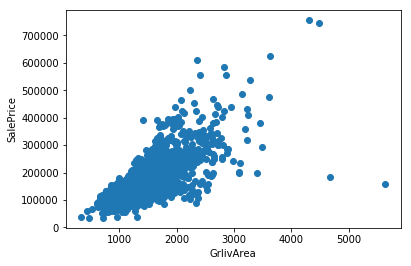

In [66]:
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrlivArea')
plt.show()

In [67]:
df_train[df_train['GrLivArea']>4000]

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType - New,SaleType - None,SaleType - Oth,SaleType - WD,SaleCondition - Abnorml,SaleCondition - AdjLand,SaleCondition - Alloca,SaleCondition - Family,SaleCondition - Normal,SaleCondition - Partial
523,524,130.0,40094,9,4,762.0,4,2,5,3,...,1,0,0,0,0,0,0,0,0,1
691,692,104.0,21535,9,5,1170.0,4,2,5,3,...,0,0,0,1,0,0,0,0,1,0
1182,1183,160.0,15623,9,4,0.0,3,2,5,3,...,0,0,0,1,1,0,0,0,0,0
1298,1299,313.0,63887,9,4,796.0,4,2,5,3,...,1,0,0,0,0,0,0,0,0,1


In [68]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000)].index)

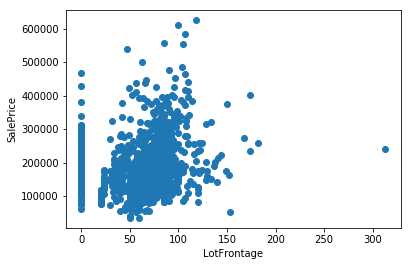

In [69]:
plt.scatter(x = df_train['LotFrontage'], y = df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('LotFrontage')
plt.show()

In [70]:
df_train = df_train.drop(df_train[(df_train['LotFrontage']>250)].index)

In [71]:
df_train.shape

(1455, 284)

In [72]:
df_train = df_train.drop('Id',axis = 1)

# Model Building

In [73]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [74]:
Y = np.log(df_train[['SalePrice']])
X = df_train.drop('SalePrice',axis = 1)

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [86]:
lasso01 = Lasso(alpha=0.0004, max_iter=10e5)
lasso01.fit(X_train,y_train)
train_score01=lasso01.score(X_train,y_train)
test_score01=lasso01.score(X_test,y_test)
coeff_used01 = np.sum(lasso01.coef_!=0)
print("training score for alpha=0.0004:", train_score01 )
print("test score for alpha =0.0004: ", test_score01)
print("number of features used: for alpha =0.0004:", coeff_used01)

training score for alpha=0.11: 0.942423386020711
test score for alpha =0.11:  0.9073994282293252
number of features used: for alpha =0.11: 121


In [87]:
lasso01_coef = pd.Series(lasso01.coef_, index=X_train.columns)

In [88]:
var = lasso01_coef[lasso01_coef!=0].index
X_train2 = X_train[var]

In [89]:
lasso01_coef.sort_values()

MSZoning - C (all)        -0.230963
SaleCondition - Abnorml   -0.084993
Neighborhood - MeadowV    -0.067258
MSSubClass - 160          -0.065780
MSZoning - RM             -0.054500
MSSubClass - 30           -0.049313
LandSlope - Sev           -0.049215
KitchenAbvGr              -0.047381
Functional - Maj2         -0.042149
Neighborhood - Edwards    -0.037721
Heating - Grav            -0.035658
Condition1 - RRAe         -0.031189
BldgType - Twnhs          -0.030224
CentralAir - N            -0.028379
Neighborhood - Mitchel    -0.027159
RoofMatl - Tar&Grv        -0.024938
Neighborhood - OldTown    -0.022465
Exterior1st - HdBoard     -0.014571
BsmtFinType1 - LwQ        -0.014288
Condition1 - Artery       -0.013999
Neighborhood - NAmes      -0.012854
SaleCondition - Family    -0.012585
Exterior1st - Wd Sdng     -0.009336
SaleType - WD             -0.008730
GarageType - CarPort      -0.008583
PavedDrive - P            -0.008508
LotConfig - Inside        -0.008318
BsmtExposure - No         -0

# Predicting

In [90]:
lasso1 = Lasso(alpha=0.0004, max_iter=10e5)
lasso1.fit(X_train2,y_train)

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
df_test = df[1460:2919]

In [92]:
df_test = df_test[var]

In [93]:
lasso_predict = lasso1.predict(df_test)

In [94]:
output = pd.DataFrame(columns=['Id','SalePrice'])
output.Id = test.Id
output.SalePrice = np.exp(lasso_predict)
output.to_csv('submission_lasso.csv', index=False)

In [ ]:
0.1198